In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newton_raphson(a, b, fun):
    x = a
    if (fun(x) * fun(b) >= 0):
        raise ValueError("f(a) * f(b) must be < 0")
    while (fun(x) != 0):
        h = 0.001
        d = (fun(x + h) - fun(x)) / h
        x = x - fun(x) / d
    return x

def f(x): 
    return x**2 - 4
print(newton_raphson(0, 3, f))

2.0


In [119]:
def plot_error(A, b, fun):
    sol = np.linalg.solve(A, b).transpose()
    plt.plot(list(range(30)), [np.mean(abs(sol - fun(A, b, i))) for i in range(30)])

In [129]:
def agh_superfast_jacobi(A: np.matrix, b: np.matrix, iterations: int=1000) -> np.matrix:    
    n = A.shape[0]
    x = np.zeros(n)
    for iteration in range(iterations):
        x1 = np.zeros(n)
        for i in range(n):
            sum = 0
            for j in range(n):
                if j != i:
                    sum = sum + A[i, j] * x[j]
            x1[i] = (1 / A[i, i]) * (b[i] - sum)
        x = x1
    return x

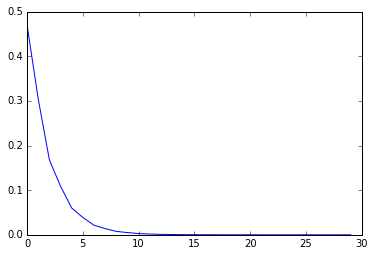

In [137]:
A = np.matrix([[22, 11], [55, 77]])
b = np.matrix([11, 13]).transpose()
plot_error(A, b, agh_superfast_jacobi)

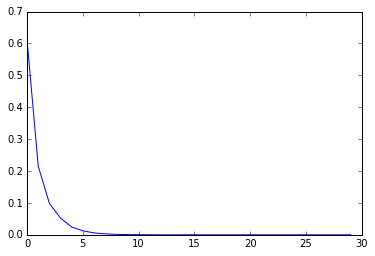

In [140]:
A = np.array([[20.0, -2.0, 4.0, 0.0],
              [-2.0, 22.0, -2.0, 6.0],
              [8.0, -5.0, 20.0, -2.0],
              [0.0, 6.0, -2.0, 16.0]])
b = np.array([6.0, 25.0, -11.0, 15.0]).transpose()
plot_error(A, b, agh_superfast_jacobi)

In [131]:
def agh_superfast_gs(A: np.matrix, b: np.matrix, iterations: int=1000) -> np.matrix:
    n = A.shape[0]
    x = np.zeros(n)
    for iteration in range(iterations):
        x1 = np.zeros(n)
        for i in range(n):
            sumL = 0
            sumU = 0
            for j in range(0, i):
                sumL = sumL + A[i,j] * x1[j]
            for j in range(i+1, n):
                sumU = sumU + A[i,j] * x[j]
            x1[i] = (1 / A[i,i]) * (b[i] - sumL - sumU)
        x = x1
    return x

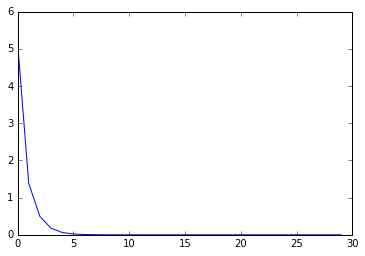

In [132]:
A = np.matrix([[22, 11], [55, 77]])
b = np.matrix([11, 13]).transpose()
plot_error(A, b, agh_superfast_gs)

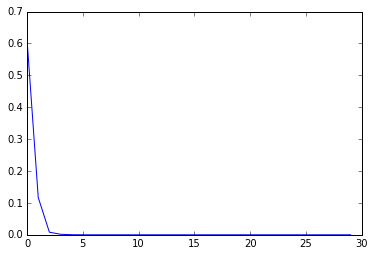

In [141]:
A = np.array([[20.0, -2.0, 4.0, 0.0],
              [-2.0, 22.0, -2.0, 6.0],
              [8.0, -5.0, 20.0, -2.0],
              [0.0, 6.0, -2.0, 16.0]])
b = np.array([6.0, 25.0, -11.0, 15.0]).transpose()
plot_error(A, b, agh_superfast_gs)

In [133]:
def agh_superfast_sor(A: np.matrix, b: np.matrix, iterations: int=1000) -> np.matrix:
    n = A.shape[0]
    x = np.zeros(n)
    omega = 1.22
    for iteration in range(iterations):
        x1 = np.zeros(n)
        for i in range(n):
            sumL = 0
            sumU = 0
            for j in range(0, i):
                sumL = sumL + A[i,j] * x1[j]
            for j in range(i+1, n):
                sumU = sumU + A[i,j] * x[j]
            x1[i] = (1 - omega) * x[i] + (omega / A[i,i]) * (b[i] - sumL - sumU)
        x = x1
    return x

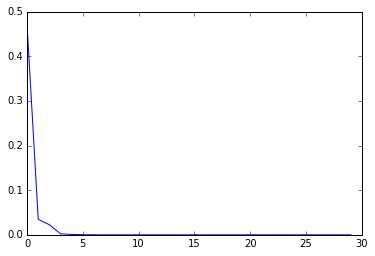

In [138]:
A = np.matrix([[22, 11], [55, 77]])
b = np.matrix([11, 13]).transpose()
plot_error(A, b, agh_superfast_sor)

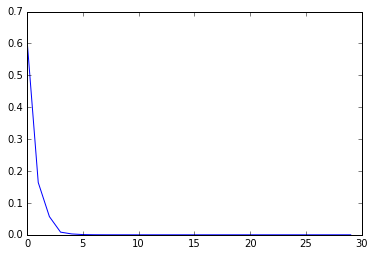

In [142]:
A = np.array([[20.0, -2.0, 4.0, 0.0],
              [-2.0, 22.0, -2.0, 6.0],
              [8.0, -5.0, 20.0, -2.0],
              [0.0, 6.0, -2.0, 16.0]])
b = np.array([6.0, 25.0, -11.0, 15.0]).transpose()
plot_error(A, b, agh_superfast_sor)